# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [226]:
#For used cars, the main determinant factors are price with respect to other features. Hence, it is important
#to understand the relationship between different features and the target variable which is price of the car.
#In order to establish the relationship, different regression models should be used. It is important to determine
#important features.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [227]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge

import warnings
warnings.filterwarnings('ignore')

In [228]:
df=pd.read_csv('./data/vehicles.csv')
df=pd.DataFrame(df)
df.head()
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [229]:
cars=df.copy()
#Removing non-important columns.
cars=cars.drop(columns=['VIN','state'])
cars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [235]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
dtypes: float64(2), int64(2), object(12)
memory usage: 52.1+ MB


In [237]:
#cars.isnull().sum()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [238]:
num_col=['year','odometer']
cat_cols=['region','manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color']

In [239]:
#Converting categorical columns into numerical columns.
le=preprocessing.LabelEncoder()
cars[cat_cols]=cars[cat_cols].apply(le.fit_transform)

In [240]:
cars = cars.drop('id', axis = 1)
cars.head(2)


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,277,6000,NaN,42,29649,6,8,5,NaN,6,3,3,4,13,12
1,105,11900,NaN,42,29649,6,8,5,NaN,6,3,3,4,13,12


In [241]:
#Replacing missing values with mean value.
fill_NaN = SimpleImputer(missing_values=np.nan, strategy='median')
cars_updated = pd.DataFrame(fill_NaN.fit_transform(cars))
cars_updated.columns = cars.columns
cars_updated.index = cars.index
cars_updated.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,277.0,6000.0,2013.0,42.0,29649.0,6.0,8.0,5.0,85548.0,6.0,3.0,3.0,4.0,13.0,12.0
1,105.0,11900.0,2013.0,42.0,29649.0,6.0,8.0,5.0,85548.0,6.0,3.0,3.0,4.0,13.0,12.0
2,111.0,21000.0,2013.0,42.0,29649.0,6.0,8.0,5.0,85548.0,6.0,3.0,3.0,4.0,13.0,12.0
3,396.0,1500.0,2013.0,42.0,29649.0,6.0,8.0,5.0,85548.0,6.0,3.0,3.0,4.0,13.0,12.0
4,131.0,4900.0,2013.0,42.0,29649.0,6.0,8.0,5.0,85548.0,6.0,3.0,3.0,4.0,13.0,12.0


In [242]:
from sklearn.preprocessing import StandardScaler

#scaling numerical data
norm = StandardScaler()
cars_updated['price'] = np.log(cars_updated['price'])
cars_updated['odometer'] = norm.fit_transform(np.array(cars_updated['odometer']).reshape(-1,1))
cars_updated['year'] = norm.fit_transform(np.array(cars_updated['year']).reshape(-1,1))
cars_updated['model'] = norm.fit_transform(np.array(cars_updated['model']).reshape(-1,1))

#scaling target variable
q1,q3=(cars_updated['price'].quantile([0.25,0.75]))
o1=q1-1.5*(q3-q1)
o2=q3+1.5*(q3-q1)
cars_updated=cars_updated[(cars_updated.price>=o1) & (cars_updated.price<=o2)]

cars_updated['region'] = norm.fit_transform(np.array(cars_updated['region']).reshape(-1,1))

cars_updated.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,0.705178,8.699515,0.186438,42.0,1.608397,6.0,8.0,5.0,-0.058119,6.0,3.0,3.0,4.0,13.0,12.0
1,-0.751436,9.384294,0.186438,42.0,1.608397,6.0,8.0,5.0,-0.058119,6.0,3.0,3.0,4.0,13.0,12.0
2,-0.700624,9.952278,0.186438,42.0,1.608397,6.0,8.0,5.0,-0.058119,6.0,3.0,3.0,4.0,13.0,12.0
3,1.712953,7.313220,0.186438,42.0,1.608397,6.0,8.0,5.0,-0.058119,6.0,3.0,3.0,4.0,13.0,12.0
4,-0.531250,8.496990,0.186438,42.0,1.608397,6.0,8.0,5.0,-0.058119,6.0,3.0,3.0,4.0,13.0,12.0


In [243]:

def result(y_test,y_pred):
    r=[]
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

### Modeling & Evaluation

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [245]:
from sklearn.model_selection import train_test_split

X = cars_updated.drop('price',axis=1)
y = cars_updated['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, test_size=0.1)
#dataframe that store the performance of each model
accu=pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)'])

In [246]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error, r2_score

#fitting model
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

#calculating error/accuracy
y_test_1,y_pred_1=y_test,y_pred
r1_lr=result(y_test_1,y_pred_1)
print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[0]))
print("Root MSLE : {}".format(r1_lr[1]))
print("R2 Score : {} or {}%".format(r1_lr[2],r1_lr[3]))
accu['Linear Regression']=r1_lr

Coefficients: 
 [-0.00253142  0.28436556 -0.0024319  -0.00649198  0.01912526  0.07480321
 -0.13264599 -0.12557938 -0.03626514  0.24573655 -0.0890819   0.03886563
 -0.01001074 -0.00374225]
MSLE : 0.005501839416983788
Root MSLE : 0.07417438518102991
R2 Score : 0.2873380657957181 or 28.7338%


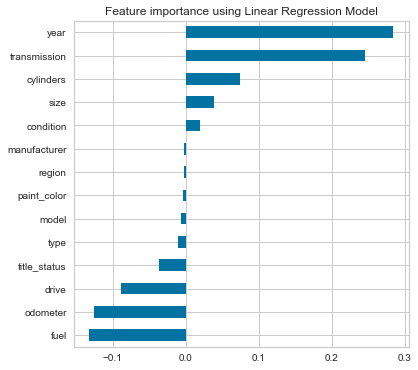

In [247]:
import matplotlib

#Ploting feature importance graph

coef = pd.Series(LR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()

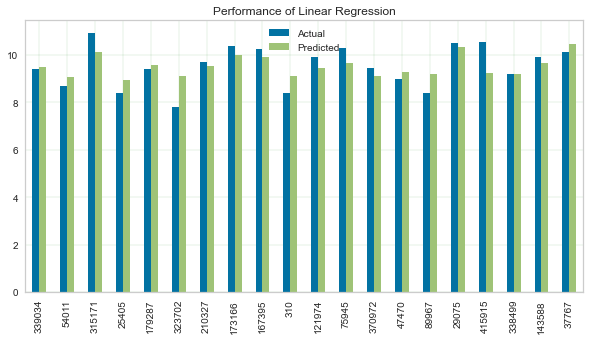

In [248]:
#Visualization of true value and predicted

df_check = pd.DataFrame({'Actual': y_test_1, 'Predicted': y_pred_1})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Green')
plt.title('Performance of Linear Regression')
plt.savefig('Linear-Regression-Performance')
plt.show()

In [249]:
#model object and fitting model
RR=Ridge(solver='auto')
RR.fit(X_train,y_train)
y_pred_2=RR.predict(X_test)

y_test_2=y_test
r2_ridge=result(y_test_2,y_pred_2)
print("MSLE : {}".format(r2_ridge[0]))
print("Root MSLE : {}".format(r2_ridge[1]))
print("R2 Score : {} or {}%".format(r2_ridge[2],r2_ridge[3]))
accu['Ridge Regression']=r2_ridge

MSLE : 0.005501837848881795
Root MSLE : 0.0741743746106551
R2 Score : 0.28733805903057696 or 28.7338%


In [250]:
from sklearn.linear_model import Lasso

#model object and fitting it
lasso=Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)

In [251]:
y_test_3,y_pred_3=y_test,y_pred
r3_lasso=result(y_test_3,y_pred_3)
print("MSLE : {}".format(r3_lasso[0]))
print("Root MSLE : {}".format(r3_lasso[1]))
print("R2 Score : {} or {}%".format(r3_lasso[2],r3_lasso[3]))
accu['Lasso Regression']=r3_lasso

MSLE : 0.005497829116587941
Root MSLE : 0.07414734733345449
R2 Score : 0.2872640436446854 or 28.7264%


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [ ]:
## Important Features to select the used car with respect to price are as below.
# Year
# Transmission
# Cylinder
# Drive
# Odometer
# Fuel